In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

#import all libraries

In [15]:
img = image.load_img("Dataset\\train\\srg\\19.jpg")
#load image to check 

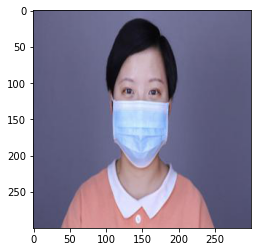

In [16]:
plt.imshow(img)
#show image

In [17]:
cv2.imread("Dataset\\train\\srg\\19.jpg").shape


(300, 300, 3)

In [18]:
train =ImageDataGenerator(rescale=1/255)
validation =ImageDataGenerator(rescale=1/255)

In [19]:
train_dataset =train.flow_from_directory("Dataset\\train\\",
                                         target_size=(224,224)
                                         ,batch_size=32,
                                        class_mode='categorical')
Validation_dataset =validation.flow_from_directory("Dataset\\test\\",
                                         target_size=(224,224)
                                         ,batch_size=32,
                                        class_mode='categorical')

Found 1956 images belonging to 5 classes.
Found 1519 images belonging to 5 classes.


In [7]:
train_dataset.class_indices

{'cloth': 0, 'n95': 1, 'n95v': 2, 'nfm': 3, 'srg': 4}

In [35]:
Validation_dataset.classes

array([0, 0, 0, ..., 4, 4, 4])

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4])

In [46]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    #1
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #2
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  #
                                  tf.keras.layers.Flatten(),
                                  #
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #
                                  tf.keras.layers.Dense(5,activation='softmax')

                                 ]
)

In [47]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
model_fit = model.fit(
    train_dataset,
    validation_data=Validation_dataset,
    steps_per_epoch=3,
    epochs=60)

Epoch 1/60
3/3 [==============================] - 16s 8s/step - loss: 1.3153 - accuracy: 0.4583 - val_loss: 1.3892 - val_accuracy: 0.4062
Epoch 2/60
3/3 [==============================] - ETA: 0s - loss: 1.4637 - accuracy: 0.3750

KeyboardInterrupt: 

In [73]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
sunflower_path = "C:\\Users\\Super\\Desktop\\Image Classification\\Dataset\\test\\nfm\\93.png"
img_height = 224
img_width = 224
img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
value=model.predict(X)
score = np.argmax(value)
if score==0:
    print("cloth")
elif score == 1:
    print("n95")
elif score == 2:
    print("n95v")
elif  score==3:
    print("nfm")
else:
    print("srg")

    



1/1 [==============================] - 0s 84ms/step
nfm


In [44]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [37]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_shape=(224, 224, 3))

In [38]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(5, activation="softmax")(headModel)

In [39]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [40]:
for layer in baseModel.layers:
    layer.trainable = False

In [41]:
print("[INFO] compiling model...")
opt = Adam(learning_rate=0.00001, decay=0.00001 / 30)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["categorical_accuracy"])

[INFO] compiling model...


In [50]:
data = np.array(train_dataset, dtype="float32")
#new_data=aug.flow(data),

MemoryError: Unable to allocate 18.4 MiB for an array with shape (32, 224, 224, 3) and data type float32

In [48]:
H = model.fit(
    
    train_dataset,
    steps_per_epoch=len(train_dataset) // BS,
    validation_data=Validation_dataset,
    validation_steps=len(Validation_dataset) // BS,
    epochs=300)


Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 1.9735 - categorical_accuracy: 0.1250 - val_loss: 1.4940 - val_categorical_accuracy: 0.3438
Epoch 2/300
1/1 [==============================] - 2s 2s/step - loss: 1.6164 - categorical_accuracy: 0.1875 - val_loss: 1.5708 - val_categorical_accuracy: 0.3438
Epoch 3/300
1/1 [==============================] - 3s 3s/step - loss: 1.8377 - categorical_accuracy: 0.2500 - val_loss: 1.6461 - val_categorical_accuracy: 0.2188
Epoch 4/300
1/1 [==============================] - 2s 2s/step - loss: 1.7858 - categorical_accuracy: 0.1875 - val_loss: 1.4688 - val_categorical_accuracy: 0.4062
Epoch 5/300
1/1 [==============================] - 2s 2s/step - loss: 1.5710 - categorical_accuracy: 0.3125 - val_loss: 1.4586 - val_categorical_accuracy: 0.3750
Epoch 6/300
1/1 [==============================] - 2s 2s/step - loss: 1.8717 - categorical_accuracy: 0.1875 - val_loss: 1.5636 - val_categorical_accuracy: 0.3750
Epoch 7/300
1/1 [===========

1/1 [==============================] - 2s 2s/step - loss: 1.4082 - categorical_accuracy: 0.3750 - val_loss: 1.4331 - val_categorical_accuracy: 0.4375
Epoch 102/300
1/1 [==============================] - 2s 2s/step - loss: 1.7151 - categorical_accuracy: 0.3125 - val_loss: 1.3698 - val_categorical_accuracy: 0.4375
Epoch 103/300
1/1 [==============================] - 2s 2s/step - loss: 1.6090 - categorical_accuracy: 0.2812 - val_loss: 1.2769 - val_categorical_accuracy: 0.6250
Epoch 104/300
1/1 [==============================] - 2s 2s/step - loss: 1.7787 - categorical_accuracy: 0.2812 - val_loss: 1.4747 - val_categorical_accuracy: 0.4062
Epoch 105/300
1/1 [==============================] - 2s 2s/step - loss: 1.6463 - categorical_accuracy: 0.3438 - val_loss: 1.4072 - val_categorical_accuracy: 0.5000
Epoch 106/300
1/1 [==============================] - 2s 2s/step - loss: 1.8145 - categorical_accuracy: 0.3125 - val_loss: 1.3821 - val_categorical_accuracy: 0.4062
Epoch 107/300
1/1 [===========

1/1 [==============================] - 2s 2s/step - loss: 1.5324 - categorical_accuracy: 0.3438 - val_loss: 1.2871 - val_categorical_accuracy: 0.5312
Epoch 152/300
1/1 [==============================] - 2s 2s/step - loss: 1.4157 - categorical_accuracy: 0.4375 - val_loss: 1.1858 - val_categorical_accuracy: 0.5938
Epoch 153/300
1/1 [==============================] - 2s 2s/step - loss: 1.5418 - categorical_accuracy: 0.3438 - val_loss: 1.4159 - val_categorical_accuracy: 0.4688
Epoch 154/300
1/1 [==============================] - 2s 2s/step - loss: 1.4793 - categorical_accuracy: 0.2812 - val_loss: 1.1930 - val_categorical_accuracy: 0.6250
Epoch 155/300
1/1 [==============================] - 2s 2s/step - loss: 1.5468 - categorical_accuracy: 0.3750 - val_loss: 1.2172 - val_categorical_accuracy: 0.5000
Epoch 156/300
1/1 [==============================] - 2s 2s/step - loss: 1.6008 - categorical_accuracy: 0.3125 - val_loss: 1.3176 - val_categorical_accuracy: 0.4375
Epoch 157/300
1/1 [===========

1/1 [==============================] - 2s 2s/step - loss: 1.3637 - categorical_accuracy: 0.4688 - val_loss: 1.4007 - val_categorical_accuracy: 0.4062
Epoch 202/300
1/1 [==============================] - 2s 2s/step - loss: 1.2605 - categorical_accuracy: 0.5312 - val_loss: 1.2154 - val_categorical_accuracy: 0.5938
Epoch 203/300
1/1 [==============================] - 2s 2s/step - loss: 1.6396 - categorical_accuracy: 0.2500 - val_loss: 1.0227 - val_categorical_accuracy: 0.7812
Epoch 204/300
1/1 [==============================] - 2s 2s/step - loss: 1.3043 - categorical_accuracy: 0.5938 - val_loss: 1.2246 - val_categorical_accuracy: 0.5312
Epoch 205/300
1/1 [==============================] - 2s 2s/step - loss: 1.6258 - categorical_accuracy: 0.3125 - val_loss: 1.2449 - val_categorical_accuracy: 0.5625
Epoch 206/300
1/1 [==============================] - 2s 2s/step - loss: 1.4290 - categorical_accuracy: 0.4062 - val_loss: 1.2562 - val_categorical_accuracy: 0.5000
Epoch 207/300
1/1 [===========

1/1 [==============================] - 2s 2s/step - loss: 1.4085 - categorical_accuracy: 0.4062 - val_loss: 1.1056 - val_categorical_accuracy: 0.6562
Epoch 252/300
1/1 [==============================] - 3s 3s/step - loss: 1.2490 - categorical_accuracy: 0.5000 - val_loss: 1.1136 - val_categorical_accuracy: 0.6562
Epoch 253/300
1/1 [==============================] - 2s 2s/step - loss: 1.4538 - categorical_accuracy: 0.4375 - val_loss: 1.2115 - val_categorical_accuracy: 0.5625
Epoch 254/300
1/1 [==============================] - 3s 3s/step - loss: 1.4082 - categorical_accuracy: 0.3750 - val_loss: 1.1711 - val_categorical_accuracy: 0.5938
Epoch 255/300
1/1 [==============================] - 3s 3s/step - loss: 1.5376 - categorical_accuracy: 0.4375 - val_loss: 1.1739 - val_categorical_accuracy: 0.5000
Epoch 256/300
1/1 [==============================] - 3s 3s/step - loss: 1.1366 - categorical_accuracy: 0.4688 - val_loss: 0.9955 - val_categorical_accuracy: 0.6562
Epoch 257/300
1/1 [===========

[INFO] saving mask detector model...


ValueError: x and y must have same first dimension, but have shapes (20,) and (300,)

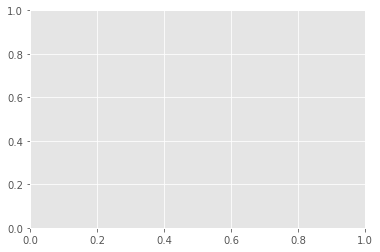

In [53]:

print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [74]:
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

[INFO] saving mask detector model...
